In [ ]:
!pip install NeuralForecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.6/213.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae,mse

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/ECL/S/df_x.csv')
Y_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/ECL/S/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...
26299,2019-07-01 21:00:00,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,-0.500000,-0.333333,-0.466667,-0.00137


In [ ]:
Y_df

,ds,unique_id,y
0,2016-07-01 02:00:00,OT,-2.162911
1,2016-07-01 03:00:00,OT,-0.949045
2,2016-07-01 04:00:00,OT,-1.077105
3,2016-07-01 05:00:00,OT,-1.129411
4,2016-07-01 06:00:00,OT,-1.154662
...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872
26300,2019-07-01 22:00:00,OT,-1.093338
26301,2019-07-01 23:00:00,OT,-1.282723
26302,2019-07-02 00:00:00,OT,-1.158270


In [ ]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [ ]:
Y_df['ex_1']=X_df['ex_1']
Y_df['ex_2']=X_df['ex_2']
Y_df['ex_3']=X_df['ex_3']
Y_df['ex_4']=X_df['ex_4']

Y_df=Y_df.dropna()

In [ ]:
Y_df['ds'] = pd.to_datetime(Y_df['ds'])


## Horizon 96

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:26208,:]
Y_test_df = Y_df.iloc[26208:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,26208,2019-06-28 02:00:00,OT,-0.929204,-0.413043,0.166667,0.400000,-0.012329
1,26209,2019-06-28 03:00:00,OT,-0.974296,-0.369565,0.166667,0.400000,-0.012329
2,26210,2019-06-28 04:00:00,OT,-0.884113,-0.326087,0.166667,0.400000,-0.012329
3,26211,2019-06-28 05:00:00,OT,-1.210576,-0.282609,0.166667,0.400000,-0.012329
4,26212,2019-06-28 06:00:00,OT,-1.113178,-0.239130,0.166667,0.400000,-0.012329
...,...,...,...,...,...,...,...,...
91,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
92,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
93,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
94,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-28 02:00:00,OT,-0.929204,-0.413043,0.166667,0.400000,-0.012329
1,2019-06-28 03:00:00,OT,-0.974296,-0.369565,0.166667,0.400000,-0.012329
2,2019-06-28 04:00:00,OT,-0.884113,-0.326087,0.166667,0.400000,-0.012329
3,2019-06-28 05:00:00,OT,-1.210576,-0.282609,0.166667,0.400000,-0.012329
4,2019-06-28 06:00:00,OT,-1.113178,-0.239130,0.166667,0.400000,-0.012329
...,...,...,...,...,...,...,...
91,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
92,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
93,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
94,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
horizon = 96
model = Informer(h=horizon, input_size=24,
               max_steps=100,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | enc_embedding | DataEmbedding | 384   
4 | dec_embedding | DataEmbedding | 384   
5 | encoder       | TransEncoder  | 199 K 
6 | decoder       | TransDecoder  | 141 K 
------------------------------------------------
341 K     Trainable params
0         Non-trainable params
341 K     Total params
1.368     Total estima

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,-0.869352
OT,1,-0.974244
OT,2,-0.901830
OT,3,-0.895187
OT,4,-0.879094
...,...,...
OT,91,-0.322454
OT,92,-0.363877
OT,93,-0.342705


<Axes: xlabel='ds'>

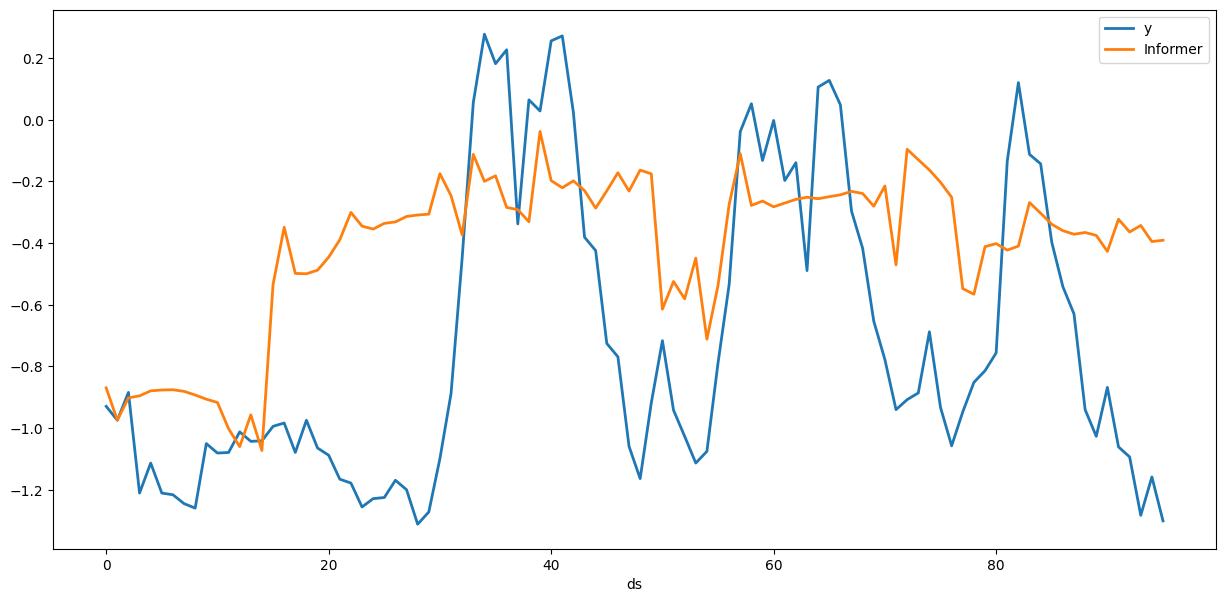

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,-0.869352
1,-0.974244
2,-0.901830
3,-0.895187
4,-0.879094
...,...
91,-0.322454
92,-0.363877
93,-0.342705


In [ ]:
mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.3f}')
print(f'Informer MSE: {mse_Informer:.3f}')

Informer MAE: 0.434
Informer MSE: 0.269


## Horizon 192

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:26112,:]
Y_test_df = Y_df.iloc[26112:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,26112,2019-06-24 02:00:00,OT,-0.857058,-0.413043,-0.500000,0.266667,-0.023288
1,26113,2019-06-24 03:00:00,OT,-0.700139,-0.369565,-0.500000,0.266667,-0.023288
2,26114,2019-06-24 04:00:00,OT,-0.402534,-0.326087,-0.500000,0.266667,-0.023288
3,26115,2019-06-24 05:00:00,OT,-0.658655,-0.282609,-0.500000,0.266667,-0.023288
4,26116,2019-06-24 06:00:00,OT,-0.763267,-0.239130,-0.500000,0.266667,-0.023288
...,...,...,...,...,...,...,...,...
187,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
188,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
189,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
190,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-24 02:00:00,OT,-0.857058,-0.413043,-0.500000,0.266667,-0.023288
1,2019-06-24 03:00:00,OT,-0.700139,-0.369565,-0.500000,0.266667,-0.023288
2,2019-06-24 04:00:00,OT,-0.402534,-0.326087,-0.500000,0.266667,-0.023288
3,2019-06-24 05:00:00,OT,-0.658655,-0.282609,-0.500000,0.266667,-0.023288
4,2019-06-24 06:00:00,OT,-0.763267,-0.239130,-0.500000,0.266667,-0.023288
...,...,...,...,...,...,...,...
187,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
188,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
189,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
190,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
horizon = 192
model = Informer(h=horizon, input_size=24,
               max_steps=250,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | enc_embedding | DataEmbedding | 384   
4 | dec_embedding | DataEmbedding | 384   
5 | encoder       | TransEncoder  | 199 K 
6 | decoder       | TransDecoder  | 141 K 
------------------------------------------------
341 K     Trainable params
0         Non-trainable params
341 K     Total params
1.368     Total estima

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=250` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,-0.645028
OT,1,-0.669701
OT,2,-0.675603
OT,3,-0.677909
OT,4,-0.681615
...,...,...
OT,187,-0.370146
OT,188,-0.709744
OT,189,-0.603372


<Axes: xlabel='ds'>

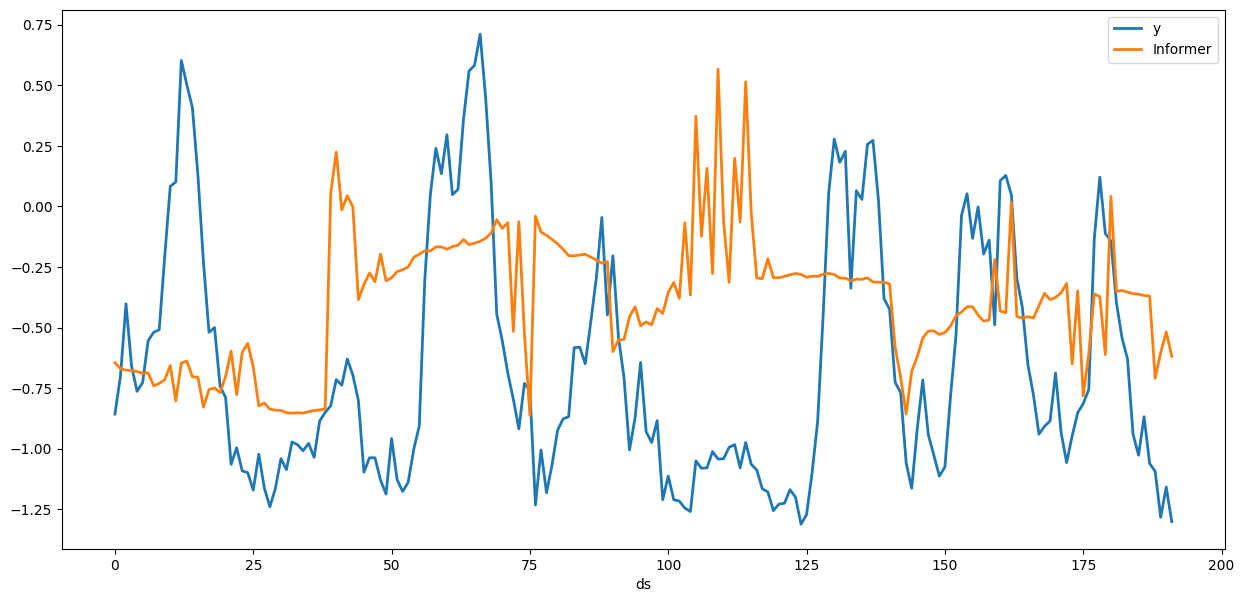

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,-0.645028
1,-0.669701
2,-0.675603
3,-0.677909
4,-0.681615
...,...
187,-0.370146
188,-0.709744
189,-0.603372


In [ ]:
mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.3f}')
print(f'Informer MSE: {mse_Informer:.3f}')

Informer MAE: 0.513
Informer MSE: 0.376


## Horizon 336

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:25967,:]
Y_test_df = Y_df.iloc[25967:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,25967,2019-06-18 01:00:00,OT,-0.844432,-0.456522,-0.333333,0.066667,-0.039726
1,25968,2019-06-18 02:00:00,OT,-0.844432,-0.413043,-0.333333,0.066667,-0.039726
2,25969,2019-06-18 03:00:00,OT,-0.869683,-0.369565,-0.333333,0.066667,-0.039726
3,25970,2019-06-18 04:00:00,OT,-0.727194,-0.326087,-0.333333,0.066667,-0.039726
4,25971,2019-06-18 05:00:00,OT,-0.830003,-0.282609,-0.333333,0.066667,-0.039726
...,...,...,...,...,...,...,...,...
332,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
333,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
334,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
335,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-18 01:00:00,OT,-0.844432,-0.456522,-0.333333,0.066667,-0.039726
1,2019-06-18 02:00:00,OT,-0.844432,-0.413043,-0.333333,0.066667,-0.039726
2,2019-06-18 03:00:00,OT,-0.869683,-0.369565,-0.333333,0.066667,-0.039726
3,2019-06-18 04:00:00,OT,-0.727194,-0.326087,-0.333333,0.066667,-0.039726
4,2019-06-18 05:00:00,OT,-0.830003,-0.282609,-0.333333,0.066667,-0.039726
...,...,...,...,...,...,...,...
332,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
333,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
334,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
335,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
horizon = 336
model = Informer(h=horizon, input_size=24,
               max_steps=400,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | enc_embedding | DataEmbedding | 384   
4 | dec_embedding | DataEmbedding | 384   
5 | encoder       | TransEncoder  | 199 K 
6 | decoder       | TransDecoder  | 141 K 
------------------------------------------------
341 K     Trainable params
0         Non-trainable params
341 K     Total params
1.368     Total estima

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=400` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,-0.547617
OT,1,-0.577662
OT,2,-0.599077
OT,3,-0.609406
OT,4,-0.623012
...,...,...
OT,331,-0.256197
OT,332,-0.314521
OT,333,-0.308423


<Axes: xlabel='ds'>

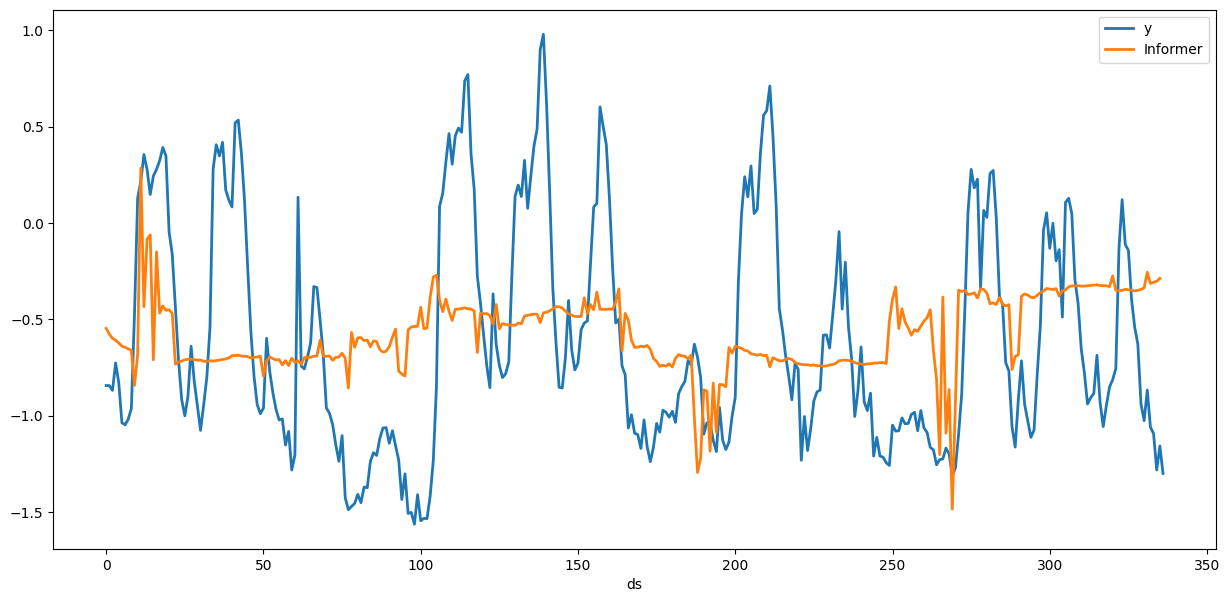

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,-0.547617
1,-0.577662
2,-0.599077
3,-0.609406
4,-0.623012
...,...
331,-0.256197
332,-0.314521
333,-0.308423


In [ ]:
mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.3f}')
print(f'Informer MSE: {mse_Informer:.3f}')

Informer MAE: 0.463
Informer MSE: 0.311


## Horizon 720

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:25583,:]
Y_test_df = Y_df.iloc[25583:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,25583,2019-06-02 01:00:00,OT,-1.010369,-0.456522,0.500000,-0.466667,-0.083562
1,25584,2019-06-02 02:00:00,OT,-1.142037,-0.413043,0.500000,-0.466667,-0.083562
2,25585,2019-06-02 03:00:00,OT,-0.936419,-0.369565,0.500000,-0.466667,-0.083562
3,25586,2019-06-02 04:00:00,OT,-0.743427,-0.326087,0.500000,-0.466667,-0.083562
4,25587,2019-06-02 05:00:00,OT,-0.970689,-0.282609,0.500000,-0.466667,-0.083562
...,...,...,...,...,...,...,...,...
716,26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
717,26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
718,26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
719,26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-02 01:00:00,OT,-1.010369,-0.456522,0.500000,-0.466667,-0.083562
1,2019-06-02 02:00:00,OT,-1.142037,-0.413043,0.500000,-0.466667,-0.083562
2,2019-06-02 03:00:00,OT,-0.936419,-0.369565,0.500000,-0.466667,-0.083562
3,2019-06-02 04:00:00,OT,-0.743427,-0.326087,0.500000,-0.466667,-0.083562
4,2019-06-02 05:00:00,OT,-0.970689,-0.282609,0.500000,-0.466667,-0.083562
...,...,...,...,...,...,...,...
716,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
717,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
718,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
719,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
horizon = 720
model = Informer(h=horizon, input_size=24,
               max_steps=400,
               )

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | enc_embedding | DataEmbedding | 384   
4 | dec_embedding | DataEmbedding | 384   
5 | encoder       | TransEncoder  | 199 K 
6 | decoder       | TransDecoder  | 141 K 
------------------------------------------------
341 K     Trainable params
0         Non-trainable params
341 K     Total params
1.368     Total estima

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=400` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,-0.583236
OT,1,-0.622526
OT,2,-0.629041
OT,3,-0.627246
OT,4,-0.616517
...,...,...
OT,715,-0.491546
OT,716,-0.490248
OT,717,-0.490641


<Axes: xlabel='ds'>

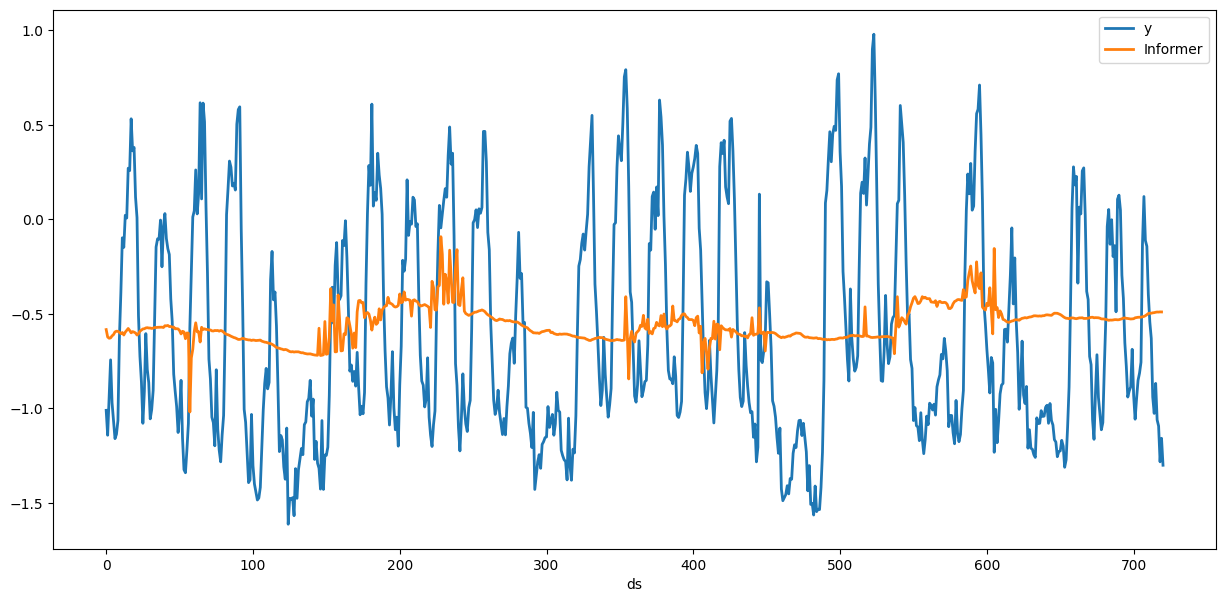

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,-0.583236
1,-0.622526
2,-0.629041
3,-0.627246
4,-0.616517
...,...
715,-0.491546
716,-0.490248
717,-0.490641


In [ ]:
mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.3f}')
print(f'Informer MSE: {mse_Informer:.3f}')

Informer MAE: 0.505
Informer MSE: 0.335
